In [1]:
import math
import os
import json
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from PIL import Image

from tqdm.auto import tqdm
from pathlib import Path

In [2]:
from ziziv2 import ZiziPipeline, get_dataset

In [3]:
dataset = get_dataset()

In [4]:
def to_pil(img_t):
    return Image.fromarray(((img_t.unsqueeze(0).permute(0, 2, 3, 1) + 1.0) * 127.5).type(torch.uint8).numpy()[0])    

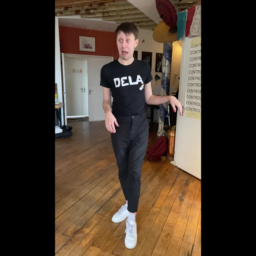

In [5]:
to_pil(dataset[2291]["images"])

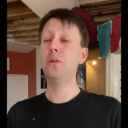

In [37]:
to_pil(dataset[33]["images"])

In [8]:
pipeline = ZiziPipeline.from_pretrained("trained-models/zizi-pose-256-9").to("mps")

In [11]:
imgs = pipeline(dataset[2291]["poses"].unsqueeze(0).to("mps"), batch_size=4, num_inference_steps=50).images

  0%|          | 0/50 [00:00<?, ?it/s]

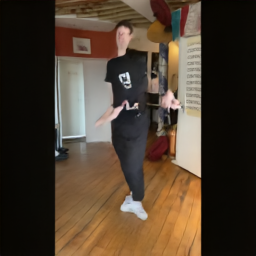

In [12]:
imgs[0]

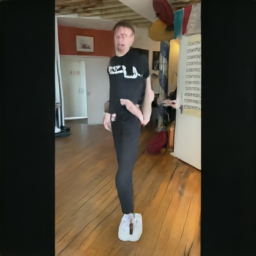

In [13]:
imgs[1]

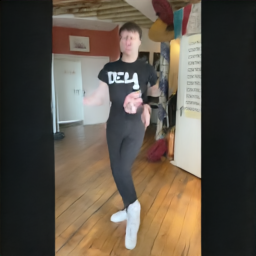

In [14]:
imgs[2]

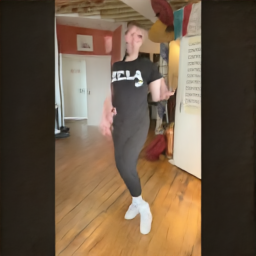

In [15]:
imgs[3]

In [17]:
close = pipeline(dataset[33]["poses"].unsqueeze(0).to("mps"), batch_size=4, num_inference_steps=100).images

  0%|          | 0/100 [00:00<?, ?it/s]

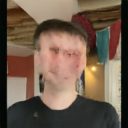

In [42]:
close[3]